# Image Processing

In [1]:
import pytesseract
import cv2

In [2]:
image = cv2.imread("data/page1.png")
base_image = image.copy()

In [3]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
from matplotlib import pyplot as plt
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

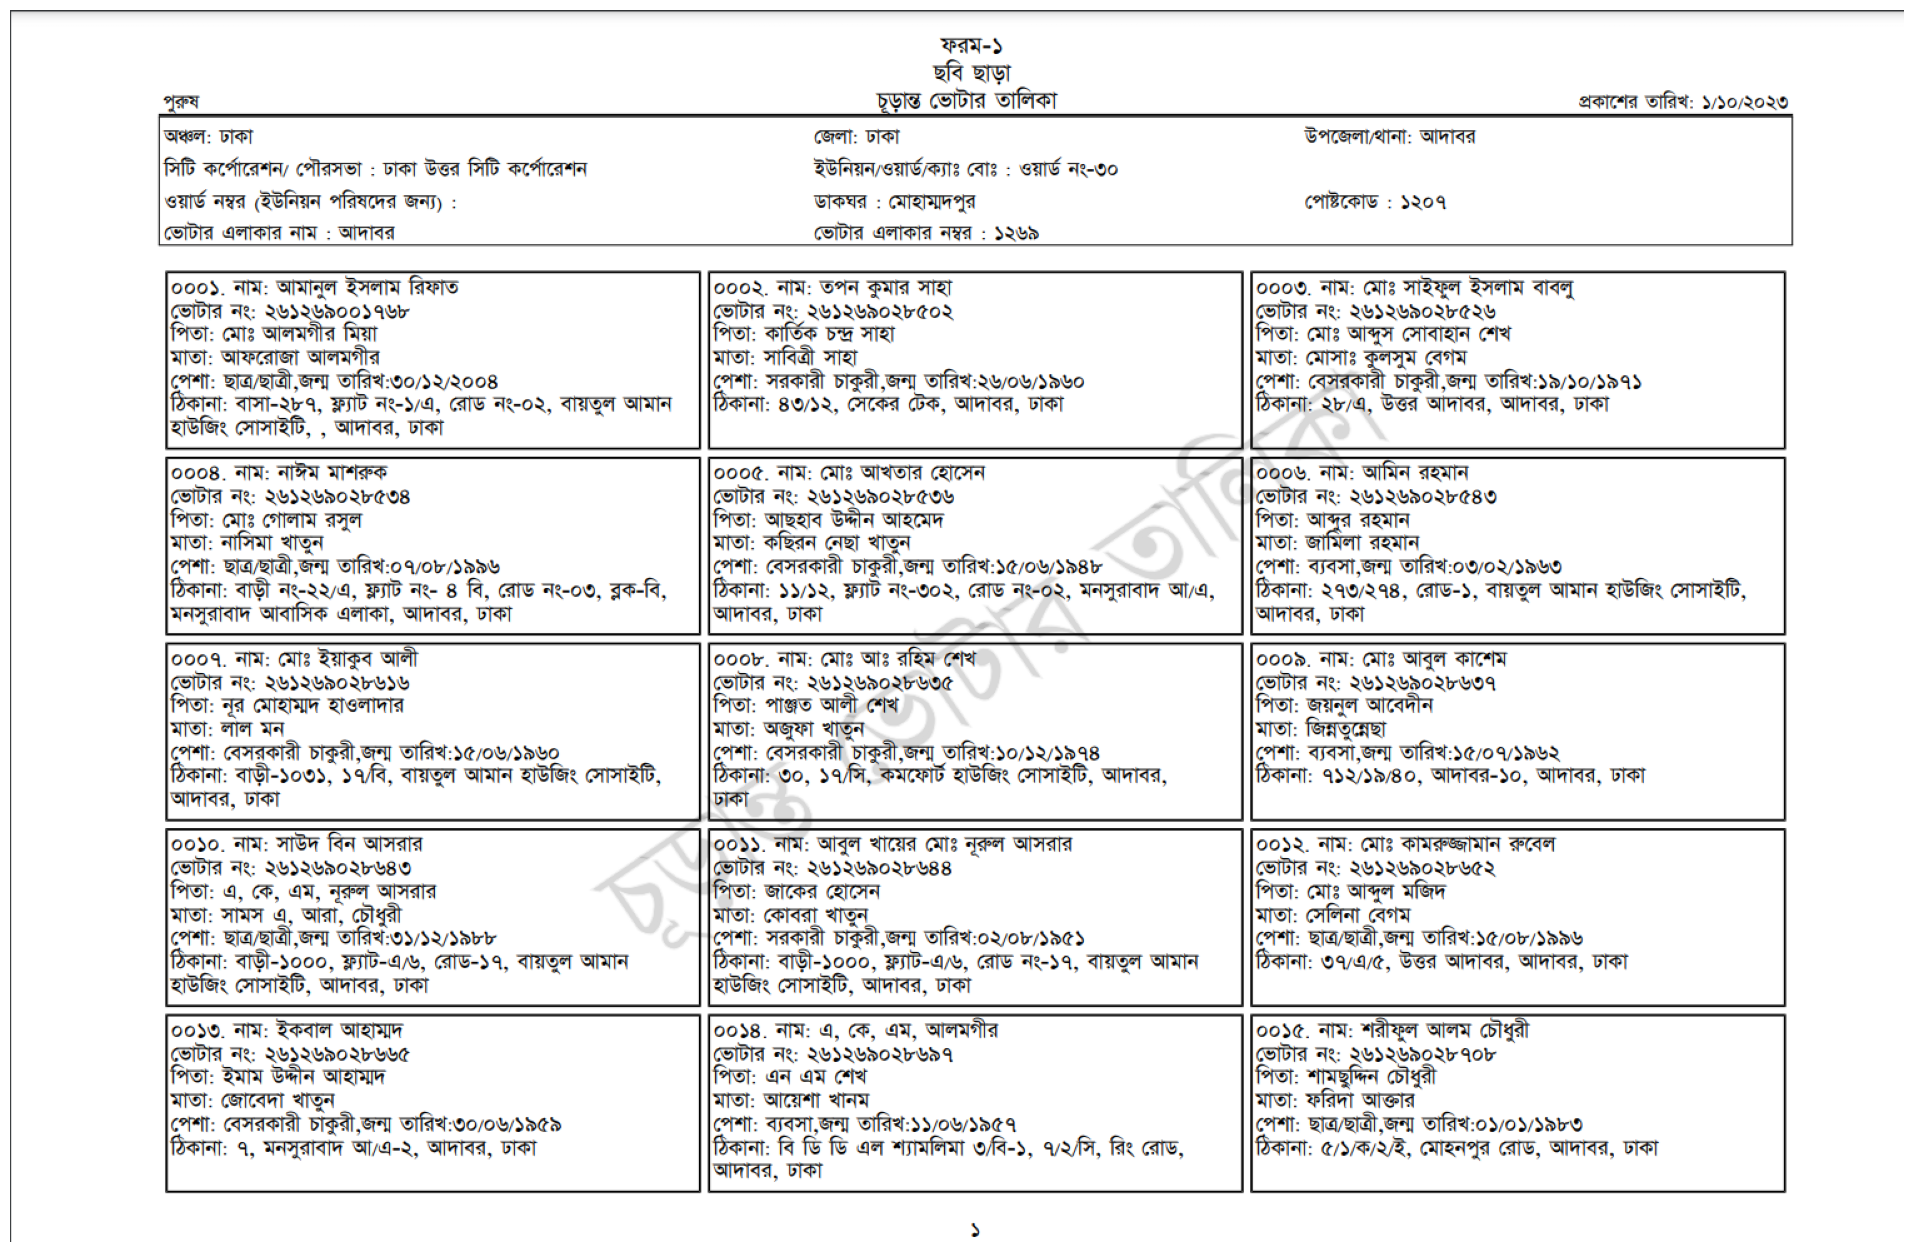

In [4]:
display("data/page1.png")

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("temp/index_gray.jpg", gray)

True

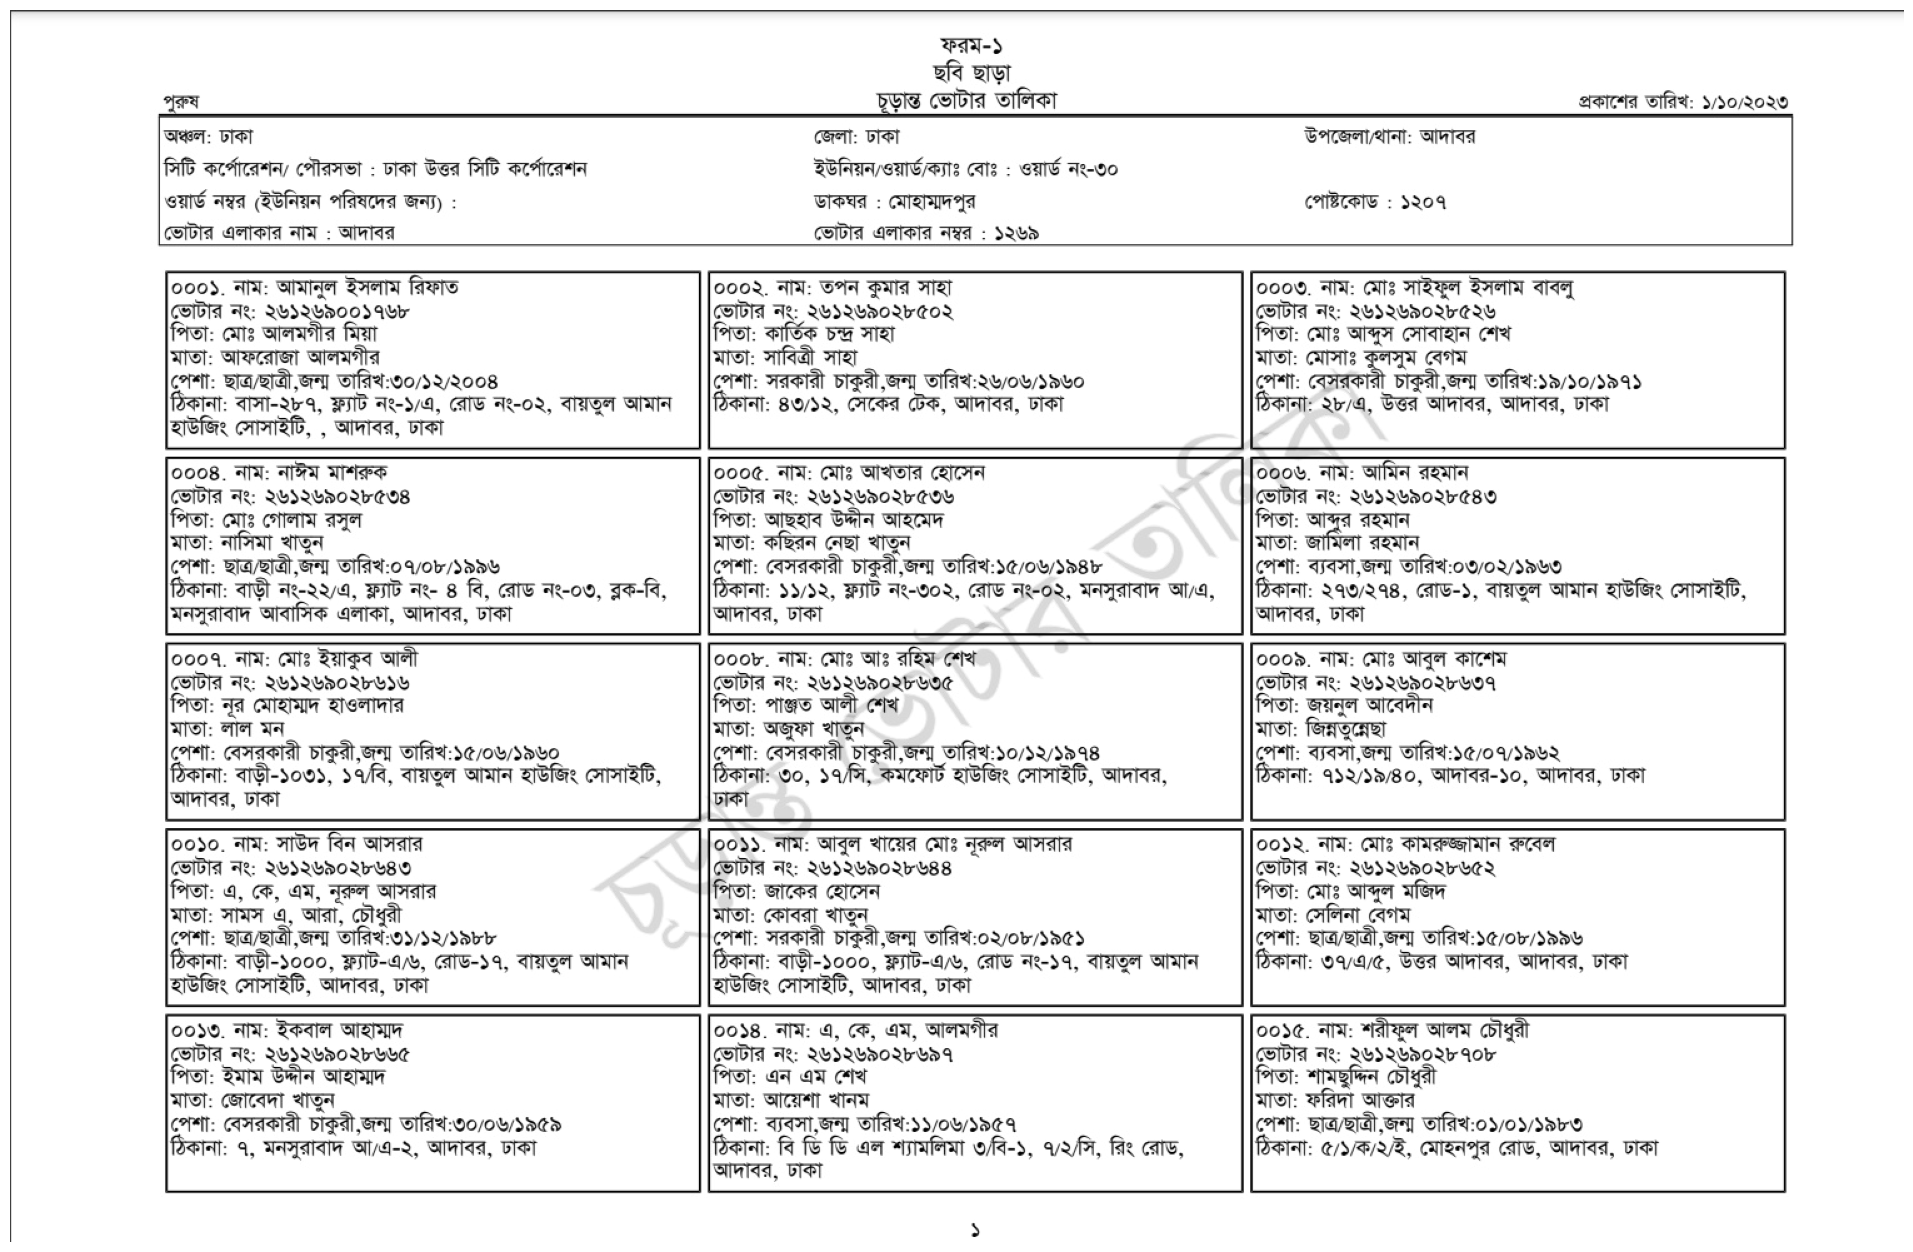

In [6]:
display("temp/index_gray.jpg")

In [7]:
blur = cv2.GaussianBlur(gray, (5,5), 0.5)
cv2.imwrite("temp/index_blur.jpg", blur)

True

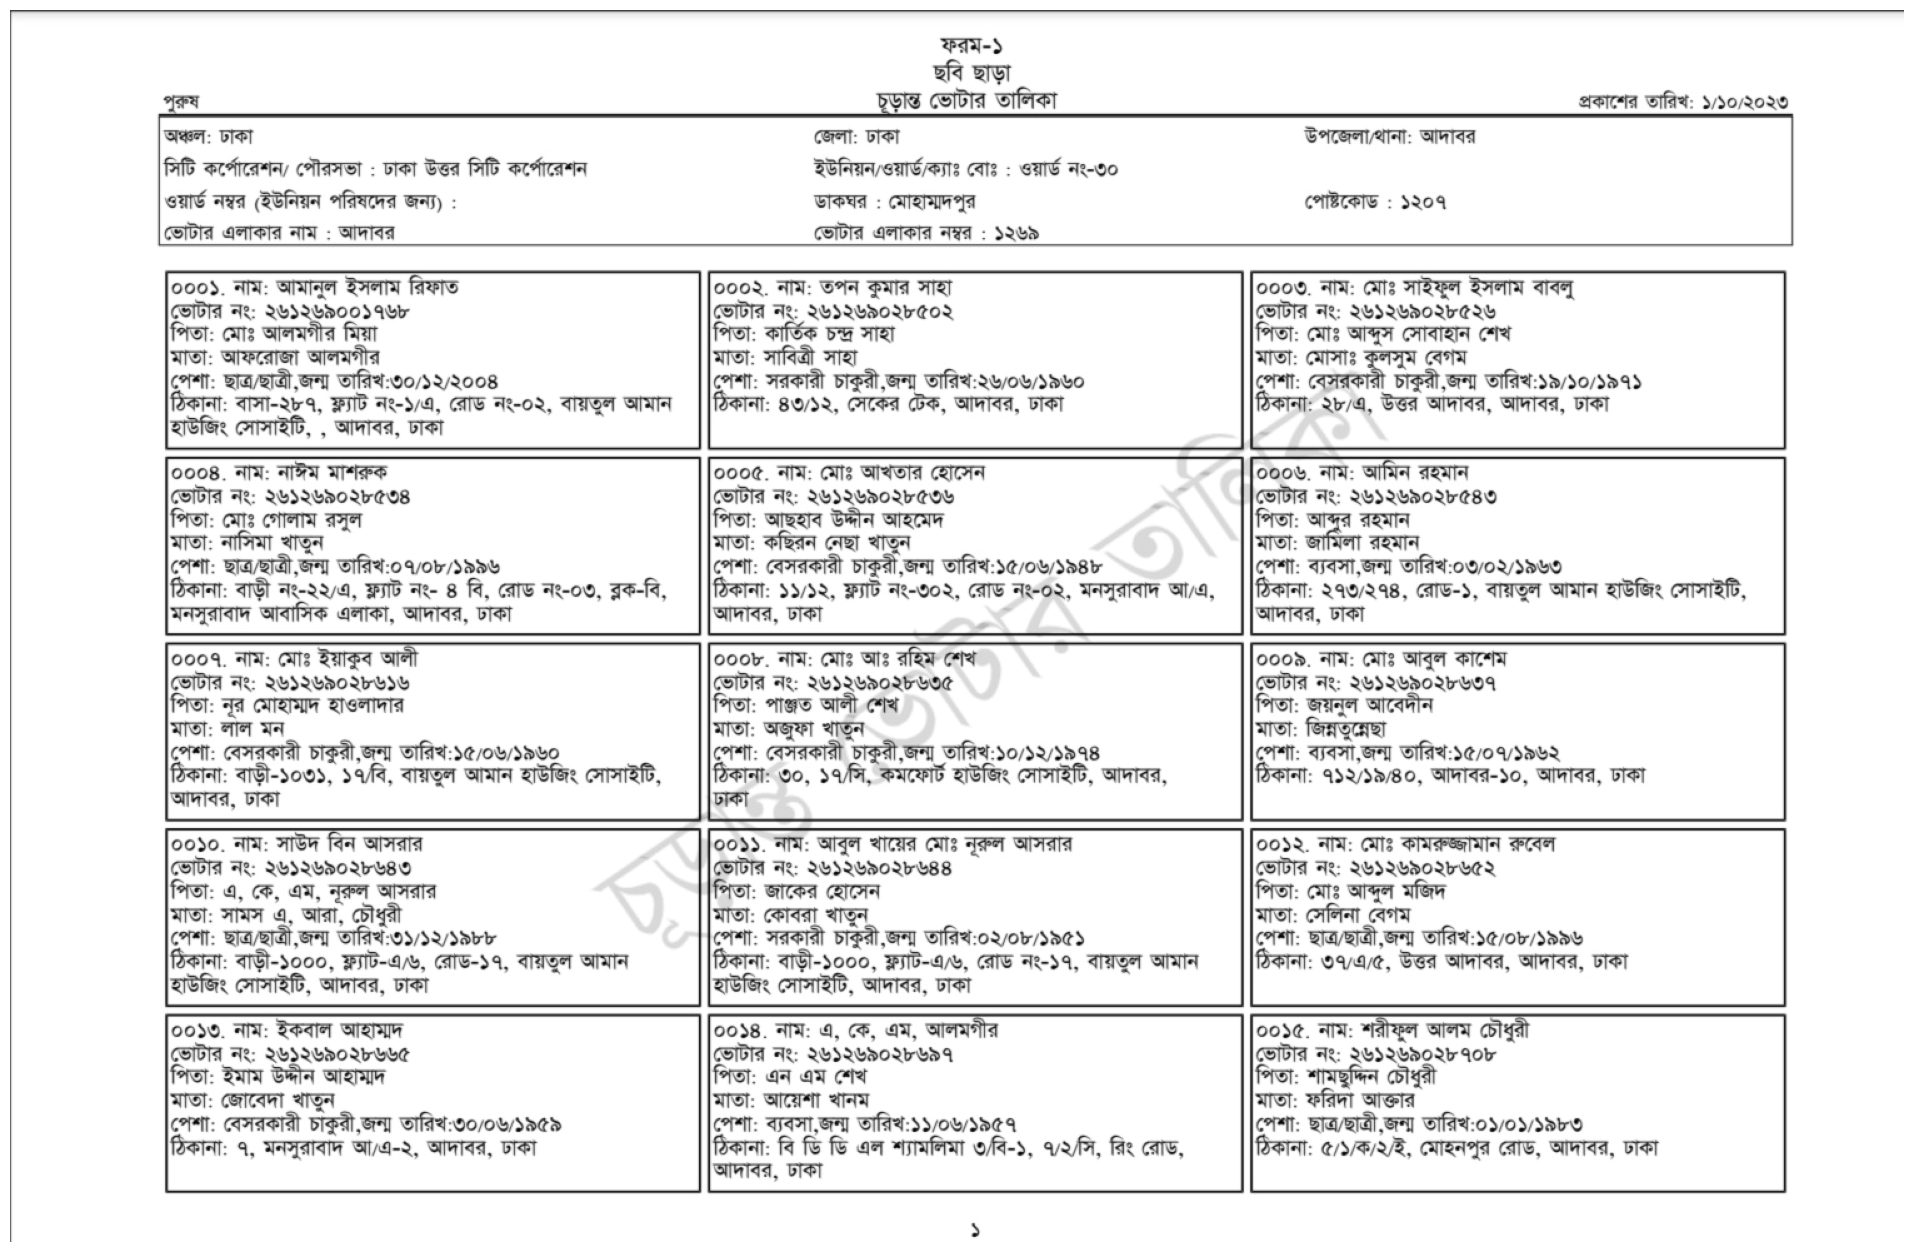

In [8]:
display("temp/index_blur.jpg")

In [9]:
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2.imwrite("temp/index_thresh.jpg", thresh)

True

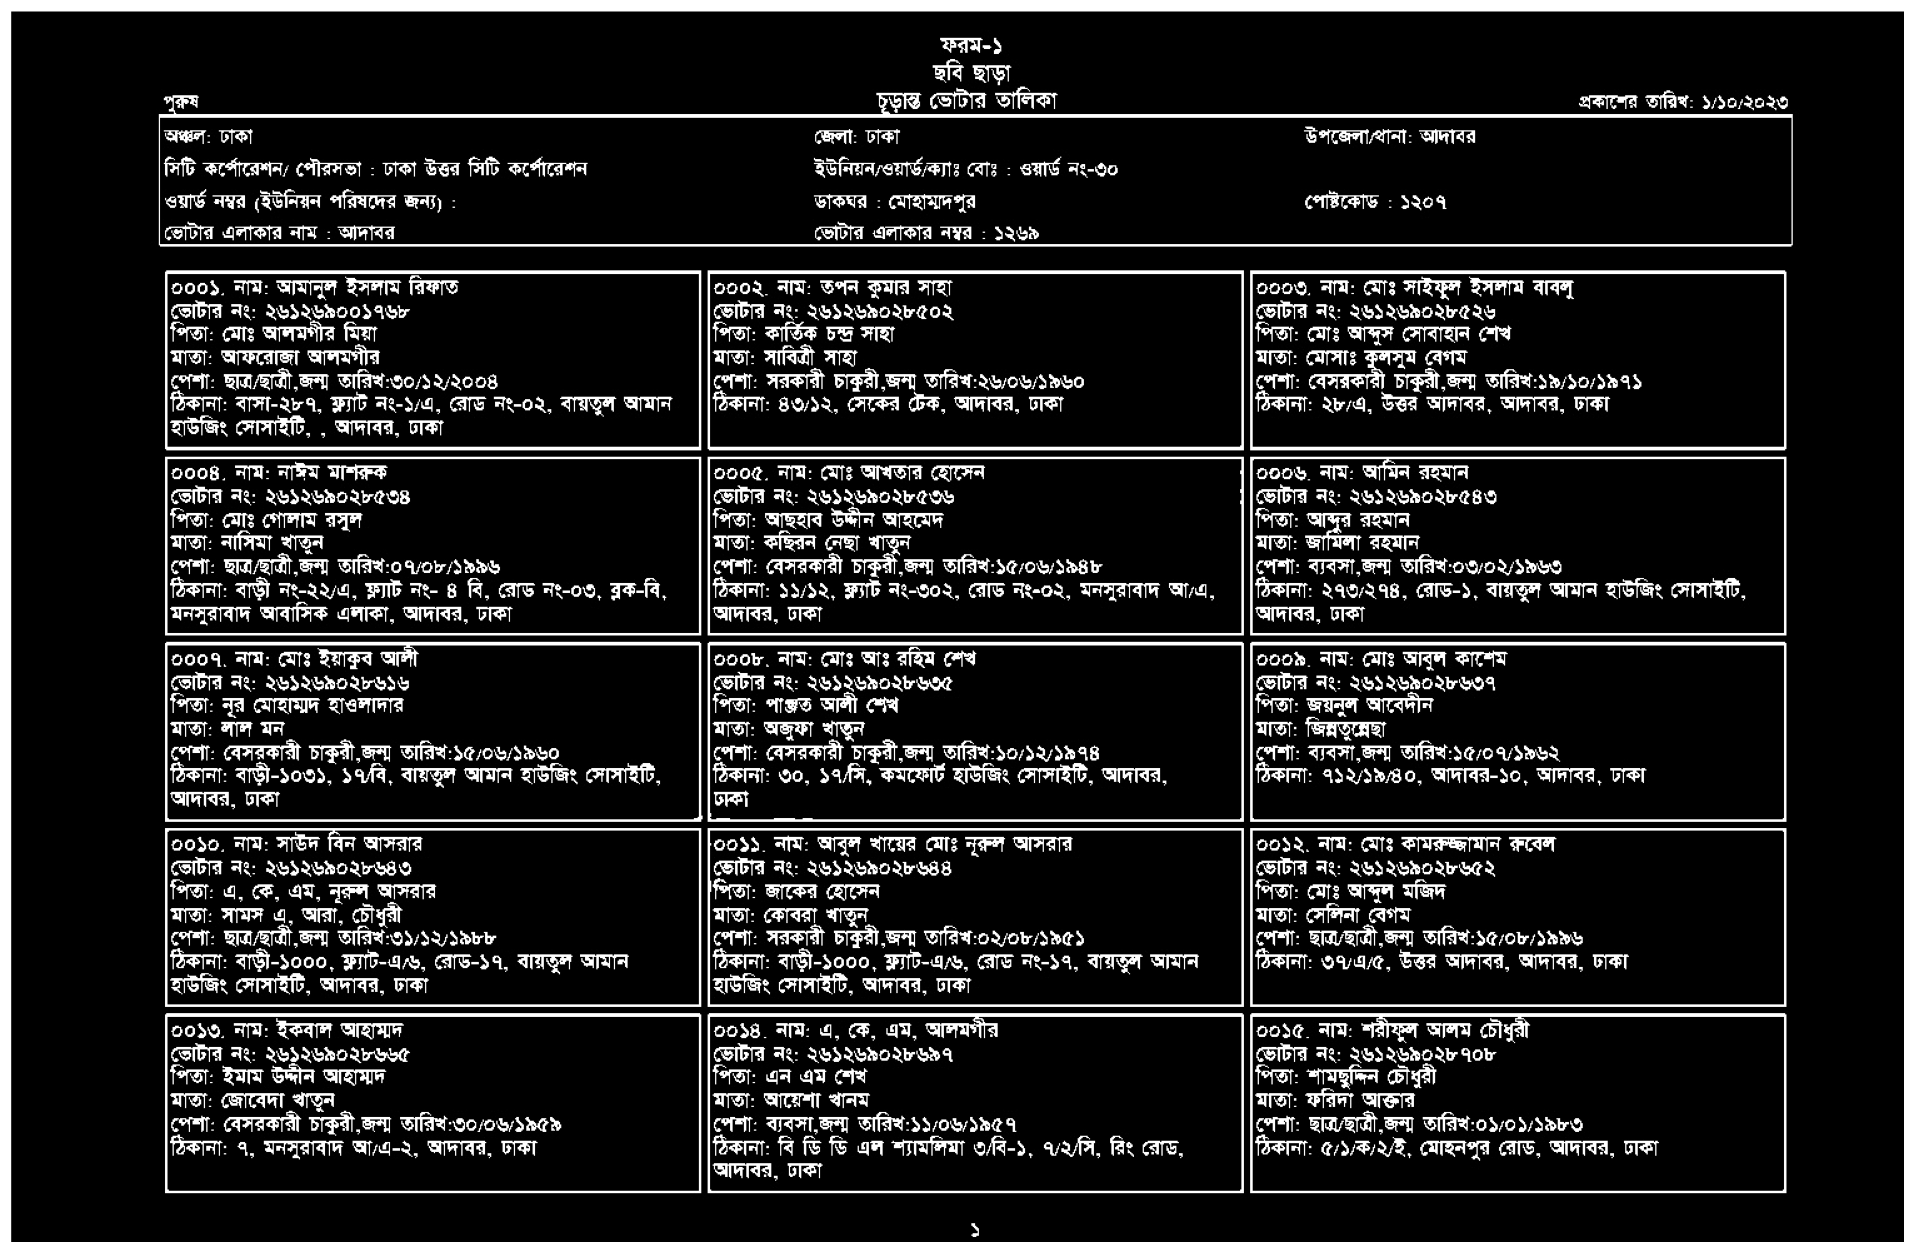

In [10]:
display("temp/index_thresh.jpg")

In [11]:
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
cnts = cnts[0] if len(cnts) == 2 else cnts[2]

In [13]:
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

In [14]:
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 20 and w < 400:
        cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 1)
    
cv2.imwrite("temp/index_bbox.jpg", image)

True

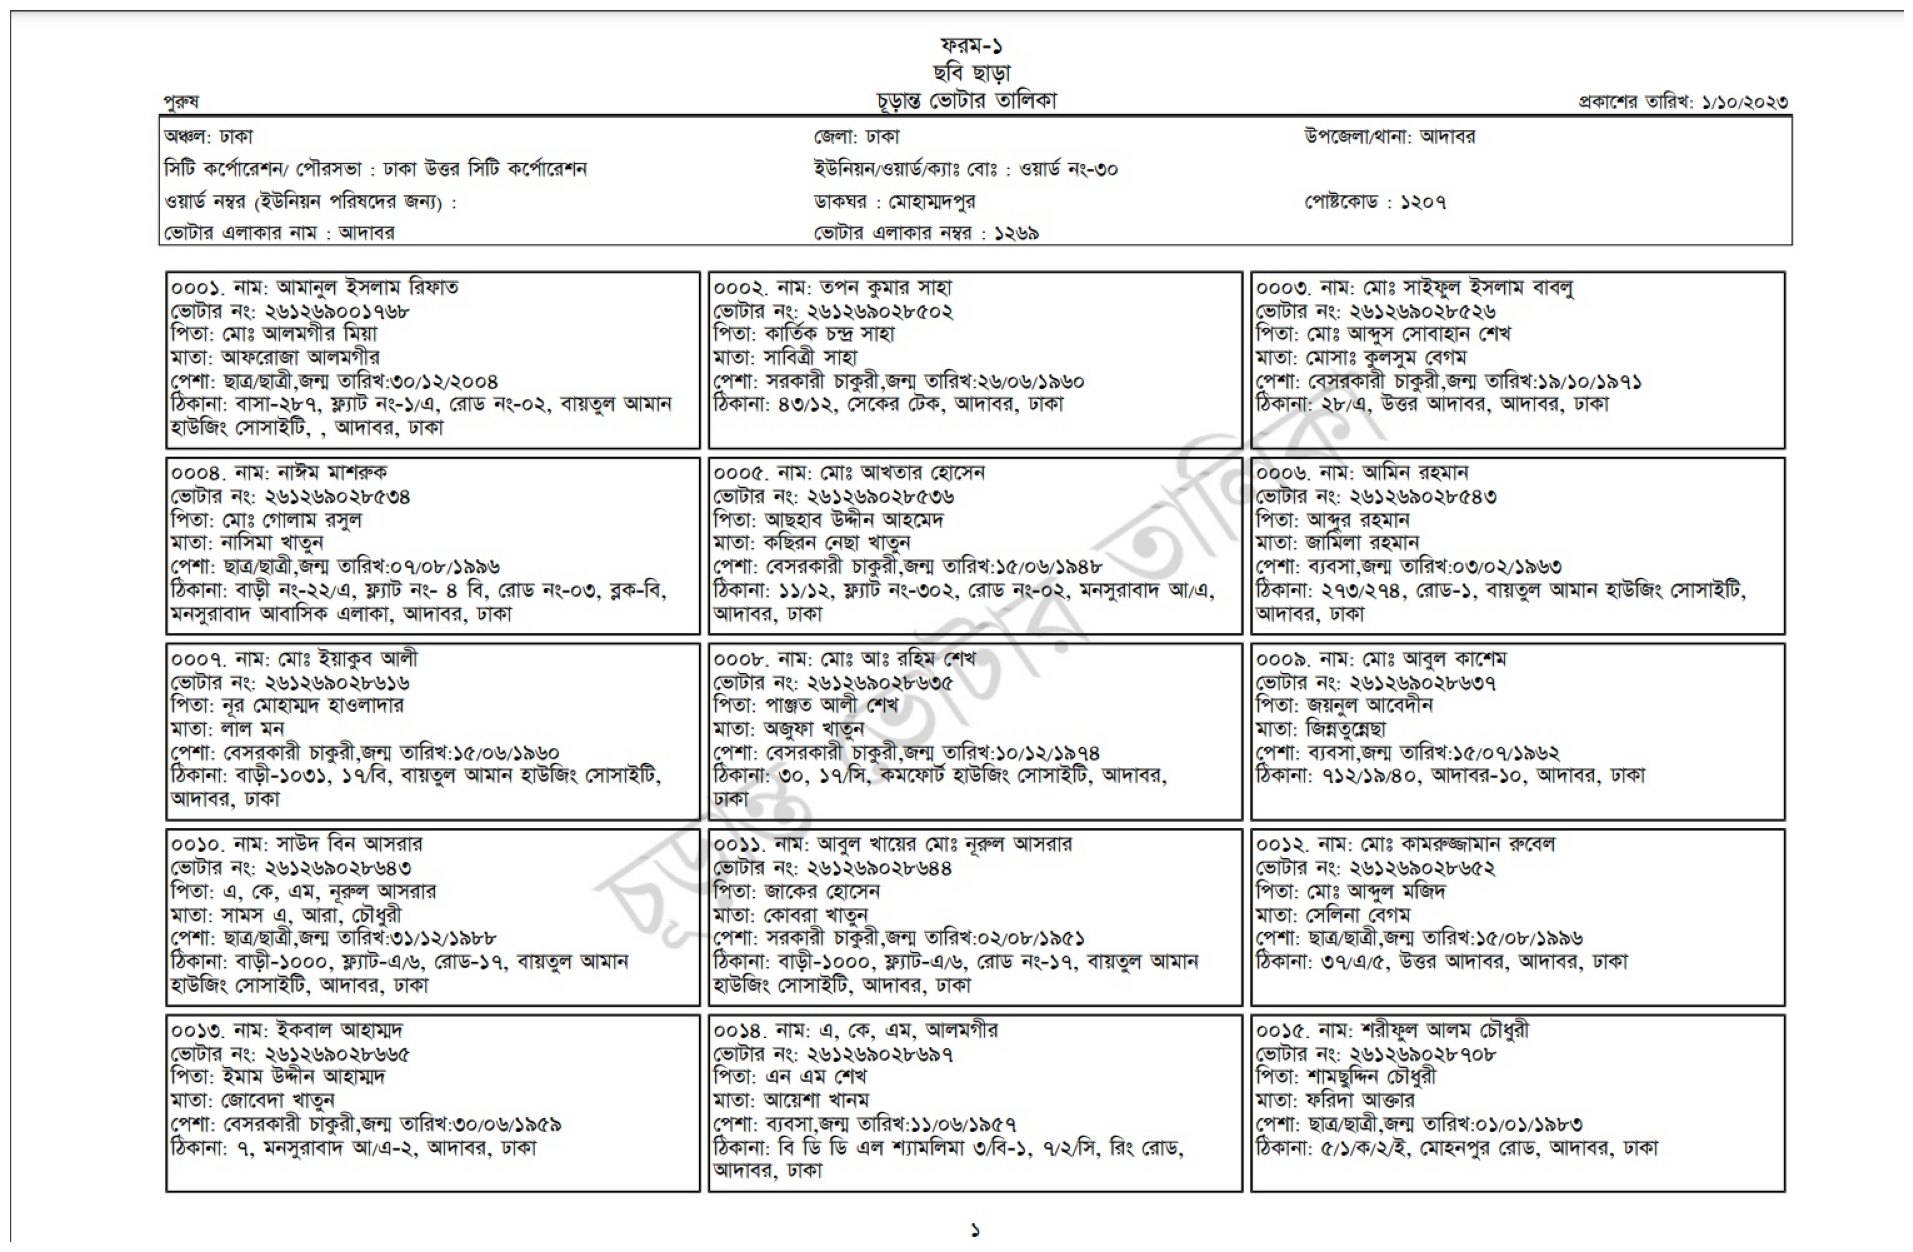

In [15]:
display("temp/index_bbox.jpg")

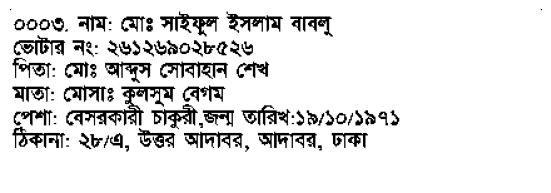

In [16]:
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 20 and w < 400:
        roi = image[y:y+h, x:x+w]
        cv2.imwrite("temp/index_roi.png", roi)
        cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 1)
        
    
display("temp/index_roi.png")

In [17]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 20 and w < 400:
        roi = image[y:y+h, x:x+w]
        ocr_result = pytesseract.image_to_string(roi, lang='Bengali')
        print(ocr_result)
        

In [18]:
ocr= pytesseract.image_to_string(image, lang='ben')
print(ocr)

ফরম-১
ছি ছাড়া

প্রকাশের তারিখ: ১/১০/২০২৩

অঞ্চল: ঢাকা জেলা: ঢাকা
সিটি কর্পোরেশন/ পৌরসভা : ঢাকা উত্তর সিটি কর্পোরেশন ইউনিয়ন/ওয়ার্ড/ক্যাঃ বোঃ : ওয়ার্ড নং-৩০
ওয়ার্ড নম্বর (ইউনিয়ন পরিষদের জন্য) : ডাকঘর : মোহাম্মদপুর পোষ্টকোড : ১২০৭
ভোটার এলাকার নাম : আদাবর ভোটার এলাকার নম্বর : ১২৬৯
1০০০১: নাম: আমানুল ইসলাম রিফাত ০০০২ নাম: তপন কুমার সাহা ooo, নাম: মোঃ সাইফুল ইসলাম বাবলু

ভোটার নং: ২৬১২৬৯০০১৭৬৮
পিতা: 7 ar মিয়া
মাতা আফরোজা আলমগীর
জন্ম তারিখ:৩০/১২/২০০৪
ঠিকানা: 'বাসা-২৮৭, ফ্ল্যাট নং-১/এ, রোড নং-০২, বায়তুল আমান
হাউজিং সোসাইটি, , আদাবর, ঢাকা

ভোটার নং: ২৬১২৬৯০২৮৫০২

পিতা: কার্তিক চন্দ্র সাহা

মাতা: সাবিত্রী সাহা

'পেশা: সরকারী চাকুরী,জন্ম তারিখ:২৬/০৬/১৯৬০
: ৪৩/১২, সেকের টেক, আদাবর, ঢাকা

ভোটার নং: ২৬১২৬৯০২৮৫২৬
পিতা: মোঃ আব্দুস সোবাহান শেখ
মাতা মোসাঃ কুলসুম বেগম
চাকুরী.জন্ম তারিখ:১৯/১০/১৯৭১
ঠিকানা ২৮/এ, উত্তর আদাবর, আদাবর, ঢাকা

০০০৪. নাম: নাঈম মাশরুক
ভোটার নং ২৬১২৬৯০২৮৫৩৪
পিতা:

পেশা: ছাত্র/ছাত্রী,জন্ম তারিখ:০৭/০৮/১৯৯৬
ঠিকানা: বাড়ী নং-২২/এ, ফ্ল্যাট Ae ৪ বি, রোড নং-০৩, ব্লক-বি,
মনসুরাবাদ 